In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
len(tf.config.list_physical_devices('GPU'))>0

True

In [3]:
iz = 244
bs = 32

In [4]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
"train",
shuffle = True,
seed = 16,
image_size = (iz, iz),
batch_size = bs
)

Found 7222 files belonging to 4 classes.


In [5]:
for images, labels in training_ds.take(1):
    print(images.shape, labels.shape)
    print(images.dtype, labels.dtype)

(32, 244, 244, 3) (32,)
<dtype: 'float32'> <dtype: 'int32'>


In [6]:
amount = int(len(training_ds) * 20/100)
# amount
validation_ds = training_ds.take(amount)

In [7]:
class_names = training_ds.class_names
print(class_names)
class_number = len(class_names)
print(class_number)

['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']
4


In [7]:
from tensorflow.keras.applications import ResNet50
model = models.Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet', input_shape = (iz, iz, 3)))
model.add(Dense(class_number, activation='softmax'))
model.layers[0].trainable = False

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23595908 (90.01 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
early = EarlyStopping(monitor = 'val_loss', patience=3)

In [11]:
history_1 = model.fit(training_ds, epochs=10, validation_data=validation_ds, callbacks=early)

Epoch 1/10
226/226 [==============================] - 642s 3s/step - loss: 0.5021 - accuracy: 0.8952 - val_loss: 0.2743 - val_accuracy: 0.9271
Epoch 2/10
226/226 [==============================] - 635s 3s/step - loss: 0.0925 - accuracy: 0.9708 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 3/10
226/226 [==============================] - 640s 3s/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0643 - val_accuracy: 0.9778
Epoch 4/10
226/226 [==============================] - 638s 3s/step - loss: 0.0219 - accuracy: 0.9918 - val_loss: 0.0133 - val_accuracy: 0.9944
Epoch 5/10
226/226 [==============================] - 639s 3s/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 6/10
226/226 [==============================] - 636s 3s/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/10
226/226 [==============================] - 627s 3s/step - loss: 0.0088 - accuracy: 0.9967 - val_loss: 0.0086 - val_accuracy: 0.9958

In [14]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
"test",
shuffle = True,
seed = 16,
image_size = (iz, iz),
batch_size = bs
)

Found 1805 files belonging to 4 classes.


In [15]:
scores_1 = model.evaluate(testing_ds)
scores_1

57/57 [==============================] - 132s 2s/step - loss: 0.0565 - accuracy: 0.9850


[0.056530263274908066, 0.9850415587425232]

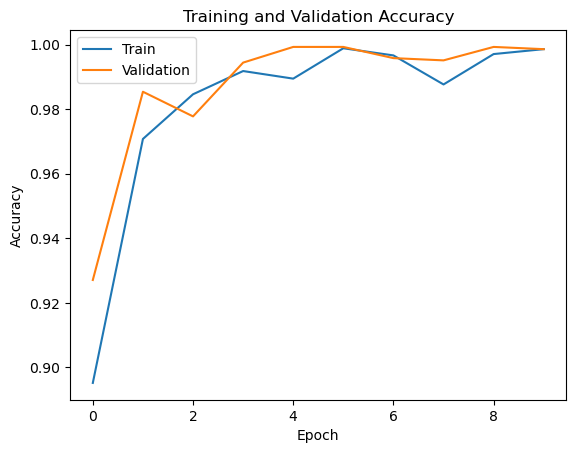

In [16]:
plt.plot(history_1.history['accuracy'], label='Train')
plt.plot(history_1.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

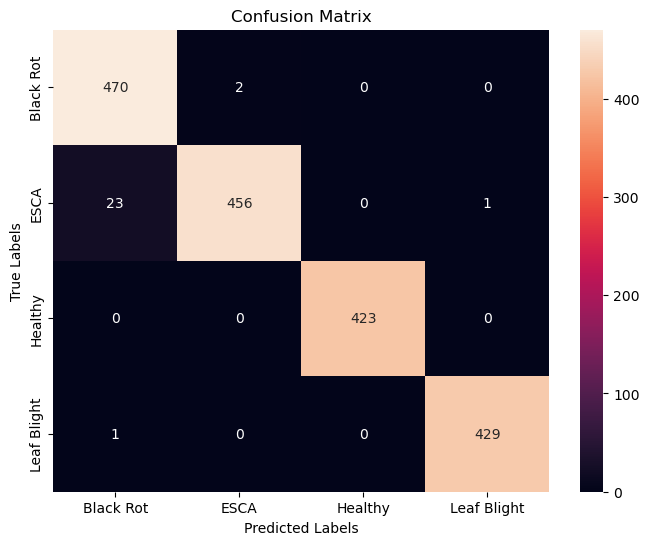

In [18]:
predicted_labels = []
true_labels = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images, verbose=0)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    
# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model.save(f"../Models/ResNet50")

INFO:tensorflow:Assets written to: ../Models/ResNet50\assets


INFO:tensorflow:Assets written to: ../Models/ResNet50\assets


In [8]:
from tensorflow.keras.applications import VGG16
model = models.Sequential()
model.add(VGG16(include_top=False, pooling='max', weights='imagenet', input_shape = (iz, iz, 3)))
model.add(Dense(class_number, activation='softmax'))
model.layers[0].trainable = False

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
early = EarlyStopping(monitor = 'val_loss', patience=3)

In [12]:
history_2 = model.fit(training_ds, epochs=10, validation_data=validation_ds, callbacks=early)

Epoch 1/10
226/226 [==============================] - 121s 469ms/step - loss: 4.5073 - accuracy: 0.7695 - val_loss: 1.1704 - val_accuracy: 0.9056
Epoch 2/10
226/226 [==============================] - 55s 242ms/step - loss: 0.8335 - accuracy: 0.9266 - val_loss: 0.4723 - val_accuracy: 0.9479
Epoch 3/10
226/226 [==============================] - 55s 245ms/step - loss: 0.4965 - accuracy: 0.9521 - val_loss: 0.3074 - val_accuracy: 0.9646
Epoch 4/10
226/226 [==============================] - 56s 247ms/step - loss: 0.3167 - accuracy: 0.9610 - val_loss: 0.1781 - val_accuracy: 0.9764
Epoch 5/10
226/226 [==============================] - 56s 248ms/step - loss: 0.2560 - accuracy: 0.9695 - val_loss: 0.2157 - val_accuracy: 0.9688
Epoch 6/10
226/226 [==============================] - 56s 248ms/step - loss: 0.1682 - accuracy: 0.9755 - val_loss: 0.1340 - val_accuracy: 0.9799
Epoch 7/10
226/226 [==============================] - 56s 249ms/step - loss: 0.1420 - accuracy: 0.9785 - val_loss: 0.2377 - val_a

In [1]:
scores_2 = model.evaluate(testing_ds)
scores_2

NameError: name 'model' is not defined